# Image Classification using Convolutional Neural Network (CNN)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import models, layers
from keras.datasets import cifar10

import matplotlib.pyplot as plt
plt.style.use('dark_background')


**Load the dataset**

In [ ]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [ ]:
train_images.shape


(50000, 32, 32, 3)

In [ ]:
test_images.shape

(10000, 32, 32, 3)

In [ ]:
# normalize the data by dividing it by 255.0
train_images, test_images = train_images / 255.0, test_images / 255.0



In [ ]:
test_labels[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [ ]:
train_labels = train_labels.reshape(-1,)
test_labels = test_labels.reshape(-1,)
test_labels[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

##Verify The Data

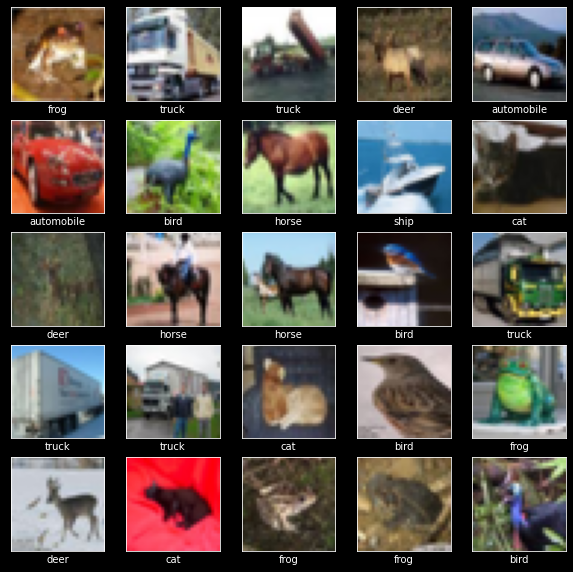

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    y[index]
    plt.xlabel(class_names[y[index]])

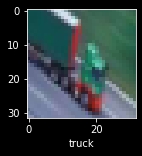

In [ ]:
plot_sample(train_images, train_labels, 50)

In [ ]:
   train_labels[50]

9

## Build CNN for Image Classification

In [ ]:
cnn_model = models.Sequential()
cnn_model.add(layers.Conv2D(32,(3,3),activation = 'relu',input_shape =(32,32,3)))
cnn_model.add(layers.Dropout(0.2))
cnn_model.add(layers.MaxPooling2D(2,2))
cnn_model.add(layers.Conv2D(64,(3,3),activation = 'relu'))
cnn_model.add(layers.Dropout(0.2))
cnn_model.add(layers.MaxPooling2D(2,2))
cnn_model.add(layers.Conv2D(128,(3,3),activation = 'relu'))
cnn_model.add(layers.Dropout(0.2))
cnn_model.add(layers.MaxPooling2D(2,2))
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(512,activation = 'relu'))
cnn_model.add(layers.Dropout(0.2))
cnn_model.add(layers.Dense(64,activation = 'relu'))
cnn_model.add(layers.Dropout(0.2))
cnn_model.add(layers.Dense(10,activation = 'softmax'))
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
dropout_10 (Dropout)         (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
dropout_11 (Dropout)         (None, 13, 13, 64)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 128)        

In [ ]:
cnn_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

r=cnn_model.fit(train_images, train_labels,validation_data=(test_images,test_labels), epochs=10)

Epoch 1/10
1563/1563 [==============================] - 140s 89ms/step - loss: 1.5899 - accuracy: 0.4191 - val_loss: 1.3166 - val_accuracy: 0.5492
Epoch 2/10
1563/1563 [==============================] - 117s 75ms/step - loss: 1.2207 - accuracy: 0.5705 - val_loss: 1.1817 - val_accuracy: 0.5953
Epoch 3/10
1563/1563 [==============================] - 115s 74ms/step - loss: 1.0698 - accuracy: 0.6256 - val_loss: 1.1183 - val_accuracy: 0.6052
Epoch 4/10
1563/1563 [==============================] - 114s 73ms/step - loss: 0.9831 - accuracy: 0.6569 - val_loss: 1.0068 - val_accuracy: 0.6552
Epoch 5/10
1563/1563 [==============================] - 117s 75ms/step - loss: 0.9078 - accuracy: 0.6877 - val_loss: 0.9586 - val_accuracy: 0.6695
Epoch 6/10
1563/1563 [==============================] - 119s 76ms/step - loss: 0.8606 - accuracy: 0.7028 - val_loss: 0.8692 - val_accuracy: 0.7187
Epoch 7/10
1563/1563 [==============================] - 114s 73ms/step - loss: 0.8123 - accuracy: 0.7168 - val_loss: 0

In [ ]:
cnn_model.evaluate(test_images, test_labels)

313/313 [==============================] - 5s 16ms/step - loss: 0.8731 - accuracy: 0.7054


[0.8730955123901367, 0.7053999900817871]

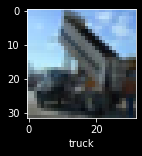

In [ ]:
plot_sample(test_images, test_labels, 50)

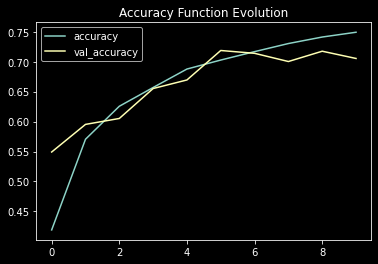

In [ ]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
pred_labels = cnn_model.predict(test_images)
y_pred_classes = [np.argmax(element) for element in pred_labels]

[[715   2  55  40  53   5  17  15  65  33]
 [ 33 687  16  18  13   5  38   5  48 137]
 [ 50   1 527  99 148  25 109  25  10   6]
 [  7   0  42 651  88  43 116  27  18   8]
 [  4   1  27  51 765   4  96  43   8   1]
 [  4   0  46 339  76 420  58  47   8   2]
 [  1   0  17  58  25   1 890   4   3   1]
 [  4   0  27  79  95  25  22 734   3  11]
 [ 43   8  16  26  12   3  12   3 851  26]
 [ 20  24  11  37   9   5  22  21  37 814]]


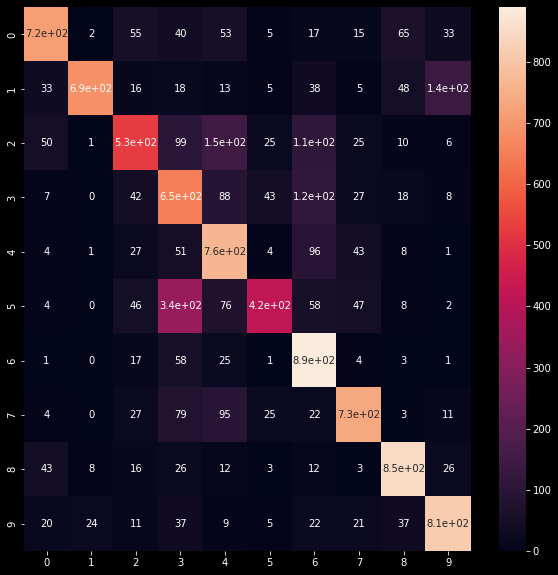

In [ ]:
cf_matrix = confusion_matrix(test_labels, y_pred_classes)
print(cf_matrix)
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(cf_matrix, annot=True)

In [ ]:
print("Classification Report:\n", classification_report(test_labels, y_pred_classes ))

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.71      0.76      1000
           1       0.95      0.69      0.80      1000
           2       0.67      0.53      0.59      1000
           3       0.47      0.65      0.54      1000
           4       0.60      0.77      0.67      1000
           5       0.78      0.42      0.55      1000
           6       0.64      0.89      0.75      1000
           7       0.79      0.73      0.76      1000
           8       0.81      0.85      0.83      1000
           9       0.78      0.81      0.80      1000

    accuracy                           0.71     10000
   macro avg       0.73      0.71      0.70     10000
weighted avg       0.73      0.71      0.70     10000



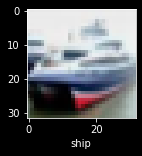

In [ ]:
plot_sample(test_images, test_labels, 1)

In [ ]:
class_names[test_labels[1]]

'ship'